In [62]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# ODE
# Método de Euler

## Ejercicio 1
$y'=y-t^2+1$
* $0<=t<=2$
* $y(t_0)=0.5$



In [63]:
%autoreload 2
from src import ODE_euler
f = lambda t, y: y - t**2 + 1
y_t0 = 0.5

a = 0
b = 2

ys,ts, h = ODE_euler(a=a, b=b, y_t0=y_t0, f=f, N=10)
ys

[0.5,
 0.8,
 1.1520000000000001,
 1.5504000000000002,
 1.9884800000000002,
 2.4581760000000004,
 2.9498112000000005,
 3.4517734400000006,
 3.950128128000001,
 4.428153753600001,
 4.865784504320001]

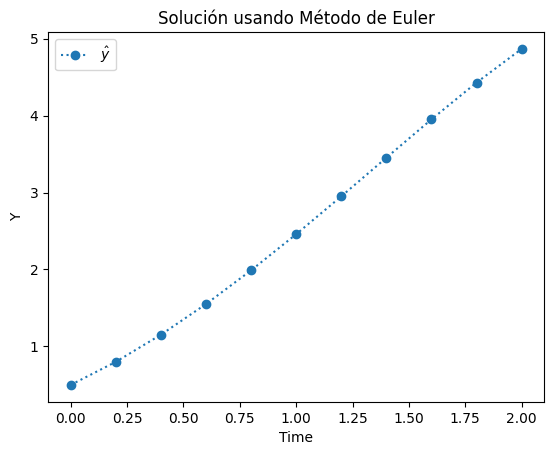

In [64]:
import matplotlib.pyplot as plt

plt.plot(ts, ys, marker="o", linestyle=":", label=r"$\hat{y}$")
plt.xlabel("Time")
plt.ylabel("Y")
plt.title("Solución usando Método de Euler")
plt.legend()
plt.show()

## Comparación con la solución real
La solución real de la ecuación diferencial es:
$y(t)=(t+1)^2-0.5e^t$

* Grafique la solución real y la aproximación obtenida con el método de Euler en una misma gráfica.



# Compare para diferentes valores de N
* $N = 15$
* $N = 20$
* $N = 50$

# Método de Taylor

In [65]:
%autoreload 2
from src import ODE_euler_nth
f = lambda t, y: y - t**2 + 1
f_p = lambda t, y: f(t,y) - 2*t
f_2p = lambda t, y: f_p(t,y) - 2

y_t0 = 0.5

a = 0
b = 2

ys_nth,ts_nth, h = ODE_euler_nth(a=a, b=b, y_t0=y_t0, f=f, N=10,f_derivatives=[f_p])
ys_nth



[0.5,
 0.8300000000000001,
 1.2158000000000002,
 1.652076,
 2.13233272,
 2.6486459183999997,
 3.191348020448,
 3.7486445849465597,
 4.306146393634803,
 4.8462986002344595,
 5.347684292286041]

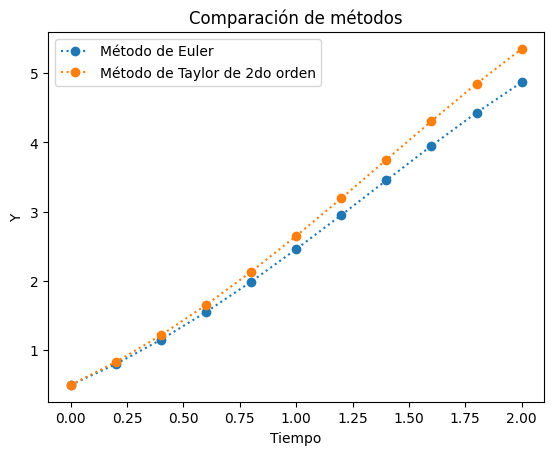

In [68]:
import matplotlib.pyplot as plt

plt.plot(ts, ys, marker="o", linestyle=":", label="Método de Euler")
plt.plot(
    ts_nth, ys_nth, marker="o", linestyle=":", label="Método de Taylor de 2do orden"
)
plt.xlabel("Tiempo")
plt.ylabel("Y")
plt.title("Comparación de métodos")
plt.legend()
plt.show()